# Search engine and database matching

|RHPEYAVSVLLR|b-ions|mass \[Da\]|y-ions|mass \[Da\]|RHPDYSVALLLR|b-ions|mass \[Da\]|y-ions|mass \[Da\]
|:- |:--|:--:|--:|:--:|:- |:--|:--:|--:|:--:|
 \- |  R | 157.11 |      HPEYAVSVLLR | 1283.71  | \- | R | 157.11 |           HPDYSVALLLR | 1283.71    
 \- |  RH | 294.17 |      PEYAVSVLLR | 1146.65  | \- | RH | 294.17 |          PDYSVALLLR | 1146.65     
 \- |  RHP | 391.22 |      EYAVSVLLR | 1049.60  | \- | RHP | 391.22 |         DYSVALLLR | 1049.60     
 \- |  RHPE | 520.26 |      YAVSVLLR | 920.56   | \- | RHPD | 506.25 |        YSVALLLR | 934.57       
 \- |  RHPEY | 683.33 |      AVSVLLR | 757.49   | \- | RHPDY | 669.31 |       SVALLLR | 771.51        
 \- |  RHPEYA | 754.36 |      VSVLLR | 686.46   | \- | RHPDYS | 756.34 |      VALLLR | 684.48         
 \- |  RHPEYAV | 853.43 |      SVLLR | 587.39   | \- | RHPDYSV | 855.41 |     ALLLR | 585.41         
 \- |  RHPEYAVS | 940.46 |      VLLR | 500.36   | \- | RHPDYSVA | 926.45 |    LLLR | 514.37         
 \- |  RHPEYAVSV | 1039.53 |     LLR | 401.29   | \- | RHPDYSVAL | 1039.53 |  LLR | 401.29         
 \- |  RHPEYAVSVL | 1152.62 |     LR | 288.20   | \- | RHPDYSVALL | 1152.62 | LR | 288.20         
 \- |  RHPEYAVSVLL | 1265.70 |     R | 175.12   | \- | RHPDYSVALLL | 1265.70 | R | 175.12         

In [8]:
from pyteomics import mass
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools
import seaborn as sns
import pandas as pd

In [9]:
def parse_mgf(filepath):
    with open(filepath) as fp: 
        lines = fp.read().split('\n')
        begin_indices = [i for i, line in enumerate(lines) if(line == "BEGIN IONS")]
        end_indices = [i for i, line in enumerate(lines) if(line == "END IONS")]
        return (lines, begin_indices, end_indices)
    
def line_to_float(line):
    return [float(f) for f in line.split(' ')]
    
def get_spectrum(mgf_data, begin, end):
    s = [line_to_float(line) for line in mgf_data[begin:end]]
    (mz, intensity) = zip(*s)
    return (np.array(mz), np.array(intensity))

def bar_overlap(mz_ref, mz_source, sigma_mz):
    n_matched_ions = 0
    total_overlap = 0
    for i, mz in enumerate(mz_source):
        d = np.min(np.abs(mz_ref - mz))
        overlap_peak = np.max([0, sigma_mz - d])
        
        if(overlap_peak > 0):
            n_matched_ions = n_matched_ions + 1
            total_overlap = total_overlap + overlap_peak
            
    return (n_matched_ions, total_overlap)

def gen_fragment_spectrum(sequence):
    n = len(sequence)
    
    mz_b_ions = [mass.calculate_mass(sequence=sequence[0:i], ion_type='b', charge=1)
                for i in range(1, n)]
    mz_y_ions = [mass.calculate_mass(sequence=sequence[i:], ion_type='y', charge=1)
                for i in range(1, n)]
    
    return np.sort(mz_b_ions + mz_y_ions)

## Load MS2 data
We read the .mgf data and generates lists of candidate sequences that match the precursor ion's mass.

23


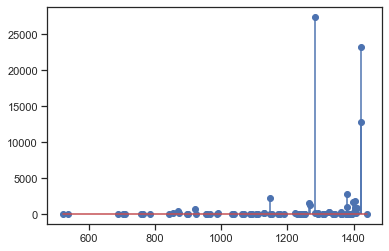

In [10]:
(mgf_data, begin, end) = parse_mgf('1B_MS2.mgf')
scan_indices = [re.search('(?<=scan=)[0-9]+', mgf_data[i + 1]).group() for i in begin]
spectra = [get_spectrum(mgf_data, begin[i] + 4, end[i]) for i in range(len(begin))]

(mz, intensity) = spectra[18]
print(scan_indices[18])
plt.stem(mz, intensity, use_line_collection=True)
plt.show()

In [11]:
search_data = [
    {'scan': '11',
     'candidate_sequences': [
         'RHPEYAVSVLLR',
         'RHPDYSVALLLR',
         'RRPMVTPGVTGLR',
         'SSLFLPRVLDHR',
         'QLRNGVQLQQQK',
         'RQQLLQEQQLR',
         'LAQGLSRAWGKPR',
         'VMEPILQILQQK',
         'NSSVTLAEHLKLK',
         'VLQVGFHLSGNIR',
     ]
    },
    {'scan': '23',
     'candidate_sequences': [
         'RHPEYAVSVLLR',
         'RHPDYSVALLLR',
         'RRPMVTPGVTGLR',
         'RPEELLSAGQLVK',
         'VIGTPHAKSFVQR',
         'LAQGLSRAWGKPR',
         'VMEPILQILQQK',
     ]
    },
    {'scan': '29',
     'candidate_sequences': [
         'RHPEYAVSVLLR',
         'RHPDYSVALLLR',
         'RPEELLSAGQLVK',
         'GKPAENDVKLGALK',
         'NLAPSSQLVRVAGK',
         'SSLFLPRVLDHR',
     ]
    },
    {'scan': '35',
     'candidate_sequences': [
         'RHPEYAVSVLLR',
         'RHPDYSVALLLR',
         'RVVVPELSAGVASR',
         'HSLAIGDKVTGTIK',
         'DLATRNLLLASPR',
         'LAQGLSRAWGKPR',
         'VMEPILQILQQK',
         'LVPNFLWAIPNR',
     ]
    },
    {'scan': '41',
     'candidate_sequences': [
         'RHPEYAVSVLLR',
         'RHPDYSVALLLR',
         'TPTKNSVVIPDLR',
         'VMEPILQILQQK',
     ]
    },
    {'scan': '47',
     'candidate_sequences': [
         'RHPEYAVSVLLR',
         'RHPDYSVALLLR',
         'GKPAENDVKLGALK',
         'NTLELITVRPQR',
         'VMEPILQILQQK',
         'RQQLLQEQQLR',
         'IDSLPAFPLLEPK',
         'WFPLLGAPAGAALR',
     ]
    },
    {'scan': '53',
     'candidate_sequences': [
         'HPEYAVSVLLR',
         'RHPDYSVALLLR',
         'RRPMVTPGVTGLR',
         'SVTILGPDISPGRK',
         'LAQGLSRAWGKPR',
         'RVVVPELSAGVASR',
     ]
    },
    {'scan': '59',
     'candidate_sequences': [
         'RHPEYAVSVLLR',
         'RHPDYSVALLLR',
         'RRPMVTPGVTGLR',
         'RQQLLQEQQLR',
         'SSLFLPRVLDHR',
     ]
    }
]

Finally, we match the experimental spectra against the theoretical ones generated from the database sequences. We have ordered our data so that the first sequence for each scan is the correct one (*RHPEYAVSVLLR*) while the remaining are those whose mass is close enough to that of the precursor ion.

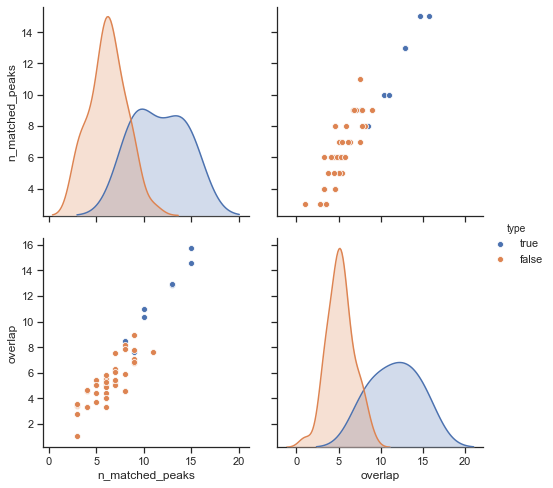

In [19]:
sigma_mz = 1.2 # Maximum drift 

score_true_matches = []
score_false_matches = []

scan_ii = [scan['scan'] for scan in search_data]
for i, scan in enumerate(search_data):
    (mz, intensity) = spectra[scan_indices.index(scan['scan'])]
    scores = [bar_overlap(mz, gen_fragment_spectrum(sequence), sigma_mz)
              for sequence in scan['candidate_sequences']]
    
    score_true_matches.append(scores[0])
    score_false_matches.extend(scores[1:])

(n_matched_peaks_true, overlap_true) = map(list, zip(*score_true_matches))
(n_matched_peaks_false, overlap_false) = map(list, zip(*score_false_matches))

df_true = pd.DataFrame({'n_matched_peaks': n_matched_peaks_true,
                        'overlap': overlap_true, 'type': 'true'})
df_false = pd.DataFrame({'n_matched_peaks': n_matched_peaks_false,
                         'overlap': overlap_false, 'type': 'false'})
df_all = df_true.append(df_false, ignore_index = True)

sns.set(style="ticks")
sns.pairplot(df_all, hue="type", height=3.5)
plt.show()

We note that our two scores, `n_matched_peaks` and `overlap`, are highly correlated and that the distribution of the scores for the incorrect candidate sequences overlaps with that of the the correct sequence's scores.

## Conclusions
Note that the *null distribution* is **not** the same as that in *multiple testing* case. Instead, it will vary depending on which search algorithm and database is used. However, the principle behind $ FDR $ estimation is the same: for a given score threshold, count how many scores/p-values is above/below the threshold in both the null and experimental distribution. The matching algorithm we have implemented here is simplistic to say the least; a more sophisticated would discriminate better...